In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

def compute_metric(coordinates, k, base_size=1000):
    # Number of points
    n_points = len(coordinates)

    # Calculate total area of the grid
    total_area = base_size**2

    lambda_ = n_points / total_area

    # Compute the search radius as a multiple of the expected nearest neighbor distance
    search_radius = np.sqrt(k/(np.pi*lambda_))

    # Build KDTree for fast radius-based searches
    tree = KDTree(coordinates)

    # Get the number of points within the search radius for each point
    counts = []
    for point in coordinates:
        indices = tree.query_ball_point(point, search_radius)
        count = len(indices) - 1  # Exclude the point itself
        counts.append(count)

    # Compute the empirical mean and variance of the counts
    counts = np.array(counts)
    empirical_variance = np.var(counts)

    # Theoretical variance for a Poisson distribution (equals the mean)
    theoretical_variance = k

    # Compute the metric (empirical variance - theoretical variance) / (empirical variance + theoretical variance)
    if empirical_variance + theoretical_variance > 0:
        metric = (empirical_variance - theoretical_variance) / (empirical_variance + theoretical_variance)
    else:
        metric = 0

    return (metric + 1)/2

In [3]:
def disjoint_subregion_variance_measure(coordinates,base_size,subgrid_size=10):
    number_of_points = len(coordinates)
    theoretical_variance = number_of_points / subgrid_size**2
    # Count the number of points in each subregion
    counts = np.zeros((subgrid_size, subgrid_size))
    for point in coordinates:
        x, y = point
        i = int(x // (base_size / subgrid_size))
        j = int(y // (base_size / subgrid_size))
        if i == subgrid_size:
            i -= 1
        if j == subgrid_size:
            j -= 1
        counts[i, j] += 1
    empirical_variance = np.var(counts)
    measure = 1 / (1 + theoretical_variance/empirical_variance)
    return measure

/var/folders/gv/36pjz46d3t38l1r5h2wkr8v00000gn/T/ipykernel_7426/2799174290.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  measure = 1 / (1 + theoretical_variance/empirical_variance)


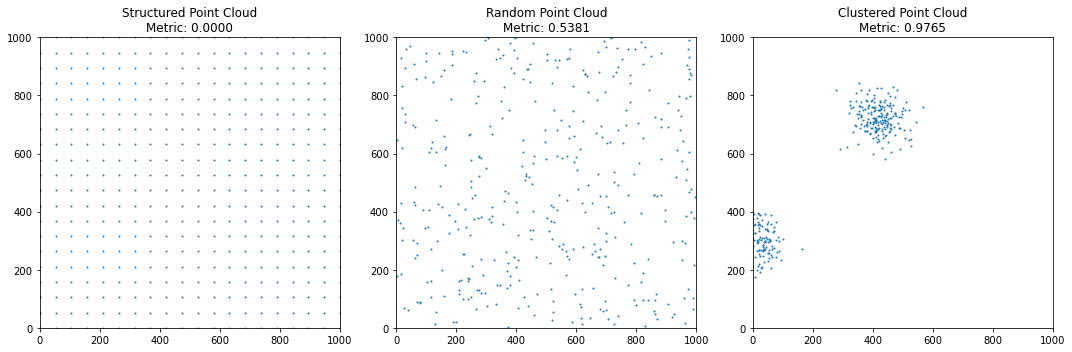

In [4]:
# Random point cloud
np.random.seed(0)
n_points = 400
coordinates_random = np.random.rand(n_points, 2) * 1000

# Clustered point cloud
np.random.seed(1)
n_clusters = 2
cluster_spread = 50
cluster_centers = np.random.rand(n_clusters, 2) * 1000
coordinates_clustered = []
for center in cluster_centers:
    points_in_cluster = center + np.random.randn(n_points // n_clusters, 2) * cluster_spread
    coordinates_clustered.append(points_in_cluster)
coordinates_clustered = np.vstack(coordinates_clustered)

# Structured point cloud
grid_size = 50
n_points_per_side = int(np.sqrt(n_points))
x = np.linspace(0, 1000, n_points_per_side)
y = np.linspace(0, 1000, n_points_per_side)
x_grid, y_grid = np.meshgrid(x, y)
coordinates_structured = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

# Compute the metric for each point cloud
#k = 5 # Adjust this value based on your needs
#metric_random = compute_metric(coordinates_random, k, base_size=1000)
#metric_clustered = compute_metric(coordinates_clustered, k, base_size=1000)
#metric_structured = compute_metric(coordinates_structured, k, base_size=1000)

# Compute the disjoint subregion variance measure for each point cloud
measure_random = disjoint_subregion_variance_measure(coordinates_random, 1000)
measure_clustered = disjoint_subregion_variance_measure(coordinates_clustered, 1000)
measure_structured = disjoint_subregion_variance_measure(coordinates_structured, 1000)

# Plot the three point clouds with the metric as the title
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Random point cloud
axs[1].scatter(coordinates_random[:, 0], coordinates_random[:, 1], s=1)
axs[1].set_title(f'Random Point Cloud\nMetric: {measure_random:.4f}')
axs[1].set_xlim(0, 1000)
axs[1].set_ylim(0, 1000)

# Clustered point cloud
axs[2].scatter(coordinates_clustered[:, 0], coordinates_clustered[:, 1], s=1)
axs[2].set_title(f'Clustered Point Cloud\nMetric: {measure_clustered:.4f}')
axs[2].set_xlim(0, 1000)
axs[2].set_ylim(0, 1000)

# Structured point cloud
axs[0].scatter(coordinates_structured[:, 0], coordinates_structured[:, 1], s=1)
axs[0].set_title(f'Structured Point Cloud\nMetric: {measure_structured:.4f}')
axs[0].set_xlim(0, 1000)
axs[0].set_ylim(0, 1000)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()